In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('top250-00-19.csv')
df.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4700 non-null   object 
 1   Position      4700 non-null   object 
 2   Age           4700 non-null   int64  
 3   Team_from     4700 non-null   object 
 4   League_from   4700 non-null   object 
 5   Team_to       4700 non-null   object 
 6   League_to     4700 non-null   object 
 7   Season        4700 non-null   object 
 8   Market_value  3440 non-null   float64
 9   Transfer_fee  4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


In [4]:
df['Market_value']=df['Market_value'].fillna(0.0)
df.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,0.0,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,0.0,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,0.0,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,0.0,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,0.0,34500000


## Question 1 : Most required positions in top 5 leagues

C:\Users\mazen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Centre-Forward'),
  Text(1, 0, 'Centre-Back'),
  Text(2, 0, 'Central Midfield'),
  Text(3, 0, 'Defensive Midfield'),
  Text(4, 0, 'Attacking Midfield'),
  Text(5, 0, 'Right Winger'),
  Text(6, 0, 'Left Winger'),
  Text(7, 0, 'Left-Back'),
  Text(8, 0, 'Goalkeeper'),
  Text(9, 0, 'Right-Back'),
  Text(10, 0, 'Second Striker'),
  Text(11, 0, 'Left Midfield'),
  Text(12, 0, 'Right Midfield'),
  Text(13, 0, 'Sweeper'),
  Text(14, 0, 'Forward')])

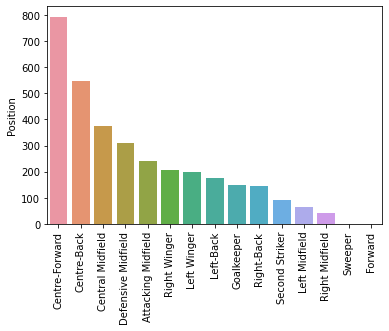

In [5]:
top5 = ['Premier League', 'Serie A', 'LaLiga', 'Ligue 1', '1.Bundesliga']
dftop=df.loc[df['League_to'].isin(top5)]
p=dftop['Position'].value_counts()
sns.barplot(p.index,p)
plt.xticks(rotation= 90)

## Question 2: How many transferes made each season on top 5

In [6]:
dftop.groupby(['Season'])['Season'].count()

Season
2000-2001    176
2001-2002    194
2002-2003    157
2003-2004    142
2004-2005    162
2005-2006    168
2006-2007    187
2007-2008    203
2008-2009    190
2009-2010    175
2010-2011    151
2011-2012    171
2012-2013    167
2013-2014    159
2014-2015    167
2015-2016    187
2016-2017    182
2017-2018    209
2018-2019    192
Name: Season, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '2000-2001'),
  Text(1, 0, '2001-2002'),
  Text(2, 0, '2002-2003'),
  Text(3, 0, '2003-2004'),
  Text(4, 0, '2004-2005'),
  Text(5, 0, '2005-2006'),
  Text(6, 0, '2006-2007'),
  Text(7, 0, '2007-2008'),
  Text(8, 0, '2008-2009'),
  Text(9, 0, '2009-2010'),
  Text(10, 0, '2010-2011'),
  Text(11, 0, '2011-2012'),
  Text(12, 0, '2012-2013'),
  Text(13, 0, '2013-2014'),
  Text(14, 0, '2014-2015'),
  Text(15, 0, '2015-2016'),
  Text(16, 0, '2016-2017'),
  Text(17, 0, '2017-2018'),
  Text(18, 0, '2018-2019')])

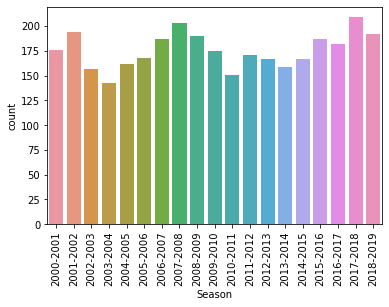

In [7]:
sns.countplot(x='Season',data=dftop)
plt.xticks(rotation=90)

## Question 3 : Top 30 players that transfered more than one time

In [8]:
dfnew=df[['Name','Season']]
dfnew

,Name,Season
0,Luís Figo,2000-2001
1,Hernán Crespo,2000-2001
2,Marc Overmars,2000-2001
3,Gabriel Batistuta,2000-2001
4,Nicolas Anelka,2000-2001
...,...,...
4695,Jasmin Kurtic,2018-2019
4696,Tchê Tchê,2018-2019
4697,Silvan Widmer,2018-2019
4698,Yuya Osako,2018-2019


C:\Users\mazen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'No of transferes')

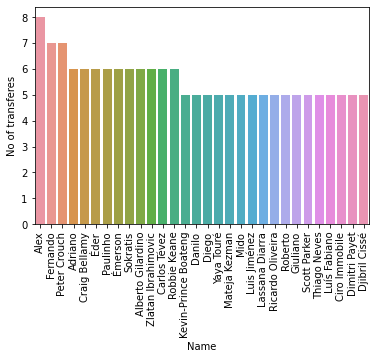

In [24]:
names = dfnew["Name"]
df3=dfnew[names.isin(names[names.duplicated()])].sort_values("Name")
data=df3.groupby('Name')['Season'].count()
pl=data.sort_values(ascending=False)[:30]
sns.barplot(pl.index,pl)
plt.xticks(rotation=90)
plt.ylabel("No of transferes")

#### Advice for clubs , don't buy Alex.

## Question 4 : Transferes count from top 5 leagues

C:\Users\mazen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='League_from'>

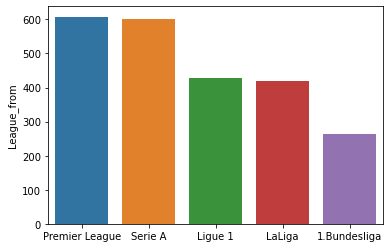

In [29]:
dftopfrom=df.loc[df['League_from'].isin(top5)]
sns.barplot(dftopfrom['League_from'].value_counts().index,dftopfrom['League_from'].value_counts())


## Question 5 : Average of prices for ages

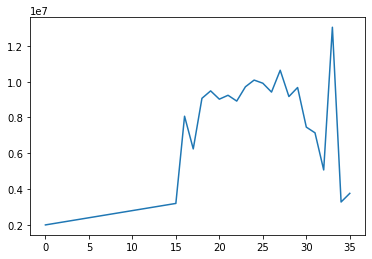

In [35]:
n=pd.DataFrame(df.groupby(['Age'])['Transfer_fee'].mean())
plt.plot(n)